In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
import numpy as np
from scipy import stats as st

In [3]:
calls= pd.read_csv('datos/megaline_calls.csv')

In [4]:
internet = pd.read_csv('datos/megaline_internet.csv')
1

1

In [5]:
messages = pd.read_csv('datos/megaline_messages.csv')

In [6]:
plans = pd.read_csv('datos/megaline_plans.csv')

In [7]:
users = pd.read_csv('datos/megaline_users.csv')

<p style="color:yellow
; font-family:Georgia; font-size:22px; font-style:italic;"> TARIFAS. </p>


In [8]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [9]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
print(plans.isnull().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [11]:
plans.duplicated().sum()

np.int64(0)

In [12]:
plans.drop_duplicates(inplace=True)
print(plans.duplicated().sum())

0


In [13]:
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

Colocaremos la columna de "plan_name" como la primera

In [14]:
columns = ['plan_name'] + [col for col in plans.columns if col != 'plan_name']
plans = plans[columns]
print(plans)

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               20          10             0.03            0.03  
1               70           7             0.01            0.01  


Verificaremos la Eficiencia de cadas plan tarifario

In [15]:
plans['efficiency'] = (plans['mb_per_month_included'] * plans['minutes_included']) / plans['usd_monthly_pay']

print(plans[['plan_name', 'efficiency']].sort_values(by='efficiency', ascending=False))

  plan_name    efficiency
1  ultimate  1.316571e+06
0      surf  3.840000e+05


El plan ‘ultimate’ ofrece más beneficios en su costo mensual, mayor valor por dinero, un
aprovechamiento optimo.

<p style="color:yellow
; font-family:Georgia; font-size:22px; font-style:italic;"> USUARIOS. </p>

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
print(users.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [19]:
users.duplicated().sum()

np.int64(0)

In [20]:
users.drop_duplicates(inplace=True)
print(users.duplicated().sum())

0


In [21]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<p style="color:yellow
; font-family:Georgia; font-size:22px; font-style:italic;"> LLAMADAS. </p>

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
print(calls.isnull().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [24]:
calls.duplicated().sum()

np.int64(0)

In [25]:
calls.drop_duplicates(inplace=True)
print(calls.duplicated().sum())

0


In [26]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Calcularemos la duracion por llamada

In [27]:
duracion_total = calls.groupby('user_id')['duration'].sum().reset_index()
duracion_total.rename(columns={'duration': 'duracion_total_llamadas'},inplace=True)
print(duracion_total)

     user_id  duracion_total_llamadas
0       1000                   116.83
1       1001                  1640.46
2       1002                   777.13
3       1003                  1041.00
4       1004                  2618.95
..       ...                      ...
476     1495                  1666.41
477     1496                  1376.21
478     1497                   276.53
479     1498                  3029.97
480     1499                  1450.31

[481 rows x 2 columns]


Vamos a convertir la columna ‘call_date’ en formato ‘datetime’ para posteriormente trabajar con ella

In [28]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
print(calls['call_date'].dtype)

datetime64[ns]


<p style="color:yellow
; font-family:Georgia; font-size:22px; font-style:italic;"> MENSAJES. </p>

In [29]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
print(messages.isnull().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [31]:
messages.duplicated().sum()

np.int64(0)

In [32]:
messages.drop_duplicates(inplace=True)
print(messages.duplicated().sum())

0


In [33]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Vamos a convertir la columna ‘message_date’ en formato ‘datetime’ para posteriormente trabajar con ella

In [34]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
print(messages['message_date'].dtype)

datetime64[ns]


Vamos a calcular la cantidad de mensajes enviados por cada usuario al  mes

In [35]:
messages['month'] = messages['message_date'].dt.to_period('M')
messages_sent_month = messages.groupby(['user_id', 'month']).agg(message_count=('id', 'count')).reset_index()
print(messages_sent_month.head())

   user_id    month  message_count
0     1000  2018-12             11
1     1001  2018-08             30
2     1001  2018-09             44
3     1001  2018-10             53
4     1001  2018-11             36



<p style="color:yellow
; font-family:Georgia; font-size:22px; font-style:italic;"> INTERNET </p>

In [36]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
print(internet.isnull().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [38]:
internet.duplicated().sum()

np.int64(0)

In [39]:
internet.drop_duplicates(inplace=True)
print(internet.duplicated().sum())

0


In [40]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Vamos a convertir la columna ‘session_date’ en formato ‘datetime’ para posteriormente trabajar con ella

In [41]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
print(internet['session_date'].dtype)

datetime64[ns]


Vamos a trabajar para obtener el uso promedio diario de internet en cada usuario

In [42]:
avg_daily_usage = internet.groupby(['user_id', 'session_date']).agg(daily_mb=('mb_used', 'sum')).reset_index()
print(avg_daily_usage)

       user_id session_date  daily_mb
0         1000   2018-12-26    270.99
1         1000   2018-12-27    880.22
2         1000   2018-12-28    660.40
3         1000   2018-12-29     89.86
4         1000   2018-12-31      0.00
...        ...          ...       ...
49028     1499   2018-12-25    924.14
49029     1499   2018-12-26    823.03
49030     1499   2018-12-29   2385.78
49031     1499   2018-12-30    304.72
49032     1499   2018-12-31    192.03

[49033 rows x 3 columns]


Trabajaremos para obtener los mb usados por mes por el usuario

In [43]:
total_usage = internet.groupby('user_id').agg(total_mb=('mb_used', 'sum')).reset_index()
print(total_usage)

     user_id   total_mb
0       1000    1901.47
1       1001   80437.94
2       1002   40293.33
3       1003   27044.14
4       1004  156352.81
..       ...        ...
484     1495   98890.96
485     1496   64268.64
486     1497   11106.55
487     1498  227525.13
488     1499   71350.23

[489 rows x 2 columns]


Trabajaremos con los datos por Usuario y los iremos agregando

Vamos a agregar los datos por usuario y por periodo para que solo exista un registro por usuario y por periodo. 
Esto nos facilitará mucho el análisis posterior de los Datos.

In [44]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['period'] = users['reg_date'].dt.to_period('M')
data_group = users.groupby(['user_id', 'period']).agg({'first_name':'first','last_name': 'first','age': 'first', 'plan': 'first',}).reset_index()
print(data_group.head(10))

   user_id   period first_name  last_name  age      plan
0     1000  2018-12   Anamaria      Bauer   45  ultimate
1     1001  2018-08     Mickey  Wilkerson   28      surf
2     1002  2018-10     Carlee    Hoffman   36      surf
3     1003  2018-01   Reynaldo    Jenkins   52      surf
4     1004  2018-05    Leonila   Thompson   40      surf
5     1005  2018-11      Livia    Shields   31      surf
6     1006  2018-11     Jesusa   Bradford   73  ultimate
7     1007  2018-07    Eusebio      Welch   42      surf
8     1008  2018-08      Emely    Hoffman   53  ultimate
9     1009  2018-04      Gerry     Little   19      surf


Vamos a calcular el número de llamadas hechas por cada usuario al mes. 

In [45]:
calls['month'] = calls['call_date'].dt.to_period('M')
month_calls = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')
print(month_calls.head())

   user_id    month  call_count
0     1000  2018-12          16
1     1001  2018-08          27
2     1001  2018-09          49
3     1001  2018-10          65
4     1001  2018-11          64


Vamos a calcular el número de mensajes enviados por cada usuario al mes

In [46]:
messages_month = messages.groupby(['user_id', 'month']).agg(total_messages=('id', 'count')).reset_index()
print(messages_month.head(10))

   user_id    month  total_messages
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36
5     1001  2018-12              44
6     1002  2018-10              15
7     1002  2018-11              32
8     1002  2018-12              41
9     1003  2018-12              50


Vamos a calcular el volumen del tráfico de Internet usado por cada usuario al mes

In [47]:
internet['month'] = internet['session_date'].dt.to_period('M')
volume_internet_traffic = internet.groupby(['user_id', 'month']).agg(volume_internet_traffic=('mb_used', 'sum')).reset_index()
print(volume_internet_traffic)

      user_id    month  volume_internet_traffic
0        1000  2018-12                  1901.47
1        1001  2018-08                  6919.15
2        1001  2018-09                 13314.82
3        1001  2018-10                 22330.49
4        1001  2018-11                 18504.30
...       ...      ...                      ...
2272     1498  2018-12                 23137.69
2273     1499  2018-09                 12984.76
2274     1499  2018-10                 19492.43
2275     1499  2018-11                 16813.83
2276     1499  2018-12                 22059.21

[2277 rows x 3 columns]


 Vamos a Fusionar los datos de llamadas, minutos, mensajes e Internet con base en: user_id y month

In [48]:
group_calls = calls.groupby(['user_id', 'month']).agg(call_count=('call_date','count')).reset_index()
group_minutes = calls.groupby(['user_id', 'month']).agg(total_minutes=('duration', 'sum')).reset_index()
merged_data = pd.merge(group_calls, group_minutes, on=['user_id', 'month'],how='outer')

group_messages = messages.groupby(['user_id', 'month']).agg(message_count=('message_date', 'count')).reset_index()
merged_data_1 = pd.merge(merged_data, group_messages, on=['user_id', 'month'],how='outer')

group_internet = internet.groupby(['user_id', 'month']).agg(compil_internet = ('mb_used', 'sum')).reset_index()
merged_data_2 = pd.merge(merged_data_1, group_internet, on=['user_id','month'],how='outer')

merged_data_2_filled = merged_data_2.fillna(0)

print(merged_data_2_filled.head())

   user_id    month  call_count  total_minutes  message_count  compil_internet
0     1000  2018-12        16.0         116.83           11.0          1901.47
1     1001  2018-08        27.0         171.14           30.0          6919.15
2     1001  2018-09        49.0         297.69           44.0         13314.82
3     1001  2018-10        65.0         374.11           53.0         22330.49
4     1001  2018-11        64.0         404.59           36.0         18504.30


Ahora lo que haremos será redondear hacía ariba los datos para al momento de hacer los calculos
sea más facil

In [49]:
new_columns = ['call_count', 'total_minutes', 'message_count','compil_internet']
for col in new_columns:
                        merged_data_2[col] = merged_data_2_filled[col].fillna(0).apply(np.ceil).astype(int)
print(merged_data_2_filled.head())

   user_id    month  call_count  total_minutes  message_count  compil_internet
0     1000  2018-12        16.0         116.83           11.0          1901.47
1     1001  2018-08        27.0         171.14           30.0          6919.15
2     1001  2018-09        49.0         297.69           44.0         13314.82
3     1001  2018-10        65.0         374.11           53.0         22330.49
4     1001  2018-11        64.0         404.59           36.0         18504.30


Se realizara modificaciones en los Df para seguir trbajando y obtener la mejor información

In [50]:
user_1 = users[['user_id','plan']]
union_data = pd.merge(merged_data_2_filled,user_1, on='user_id', how='outer')
print(union_data.head())

   user_id    month  call_count  total_minutes  message_count  \
0     1000  2018-12        16.0         116.83           11.0   
1     1001  2018-08        27.0         171.14           30.0   
2     1001  2018-09        49.0         297.69           44.0   
3     1001  2018-10        65.0         374.11           53.0   
4     1001  2018-11        64.0         404.59           36.0   

   compil_internet      plan  
0          1901.47  ultimate  
1          6919.15      surf  
2         13314.82      surf  
3         22330.49      surf  
4         18504.30      surf  


Se va a añadir la información de la tarifa 

In [51]:
final_data = pd.merge(union_data, plans, left_on='plan', right_on='plan_name', how='left')
final_data['type_plan'] = final_data.apply(lambda row: row['plan']
                                            if pd.notnull(row['plan']) else row['plan_name'], axis=1)
final_data.drop(columns=['plan', 'plan_name'], inplace=True)
print(final_data.head())

   user_id    month  call_count  total_minutes  message_count  \
0     1000  2018-12        16.0         116.83           11.0   
1     1001  2018-08        27.0         171.14           30.0   
2     1001  2018-09        49.0         297.69           44.0   
3     1001  2018-10        65.0         374.11           53.0   
4     1001  2018-11        64.0         404.59           36.0   

   compil_internet  messages_included  mb_per_month_included  \
0          1901.47               1000                  30720   
1          6919.15                 50                  15360   
2         13314.82                 50                  15360   
3         22330.49                 50                  15360   
4         18504.30                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500               20          10             0.03   
2               5

Vamos a calcular los ingresos mensuales por usuario, se va a restar el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; se va a multiplicar el resultado por el valor del plan de llamadas.
Se añadirá la tarifa mensual en función del plan de llamadas

In [52]:
final_data = pd.merge(union_data, plans, left_on='plan', right_on='plan_name', how='left')

final_data['type_plan'] = final_data.apply(lambda row: row['plan']
                                            if pd.notnull(row['plan']) else row['plan_name'], axis=1)

final_data.drop(columns=['plan', 'plan_name'], inplace=True)

final_data['extra_calls'] = (final_data['total_minutes'] - final_data['minutes_included']).clip(lower=0)
final_data['extra_texts'] = (final_data['message_count'] - final_data['messages_included']).clip(lower=0)
final_data['extra_dates'] = (final_data['compil_internet'] - final_data['mb_per_month_included']).clip(lower=0)
 
final_data['extra_charges'] = (final_data['extra_calls'] * final_data['usd_per_minute'] +
                               final_data['extra_texts'] * final_data['usd_per_message'] +
                               final_data['extra_dates'] *final_data['usd_per_gb'])

print(final_data[['user_id', 'extra_charges', 'usd_monthly_pay']].head(10)) 

   user_id  extra_charges  usd_monthly_pay
0     1000           0.00               70
1     1001           0.00               20
2     1001           0.00               20
3     1001       69704.99               20
4     1001       31443.00               20
5     1001       40091.80               20
6     1002           0.00               20
7     1002       39850.80               20
8     1002           0.00               20
9     1003      116857.63               20


#### Ahora vamos a estudiar el comportamiento de usuario

#### Llamadas

Vamos a comparar la duración promedio de llamadas por cada plan y por cada mes. 
Traza un gráfico de barras para visualizarla.

Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [53]:
mean_calls = final_data['call_count'].mean()
var_calls = final_data['call_count'].var()
print(mean_calls)
print(var_calls)



60.06759703445268
1049.9260569195724


Ahora se calculará la desviación estandar de la duración mensual de llamadas

In [54]:

std_dev_calls = final_data['call_count'].std()

print(f"Desviación estándar (método directo): {std_dev_calls:.2f}")

Desviación estándar (método directo): 32.40


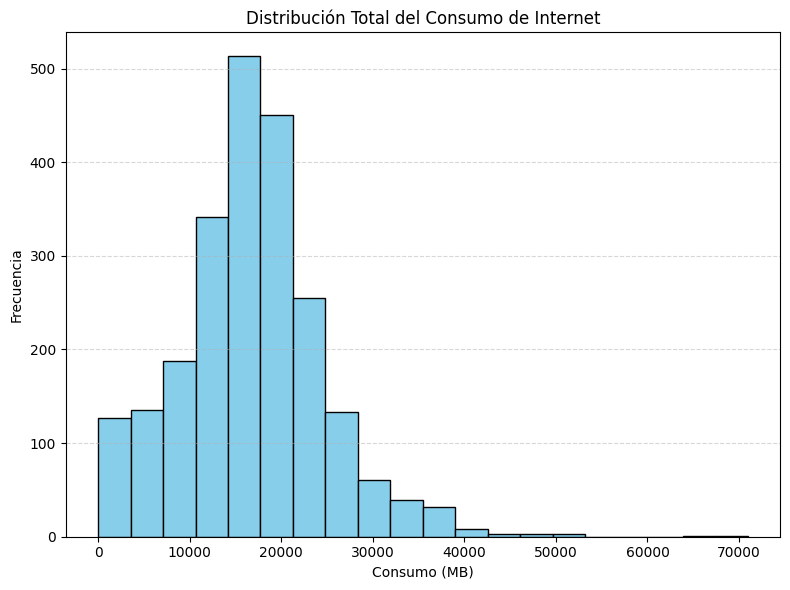

In [61]:
# Histograma del consumo general
plt.figure(figsize=(8, 6))
plt.hist(final_data['compil_internet'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución Total del Consumo de Internet')
plt.xlabel('Consumo (MB)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Internet

C:\Users\garay\AppData\Local\Temp\ipykernel_14180\4241953493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_plan', y='compil_internet', data=final_data, palette='Set2')


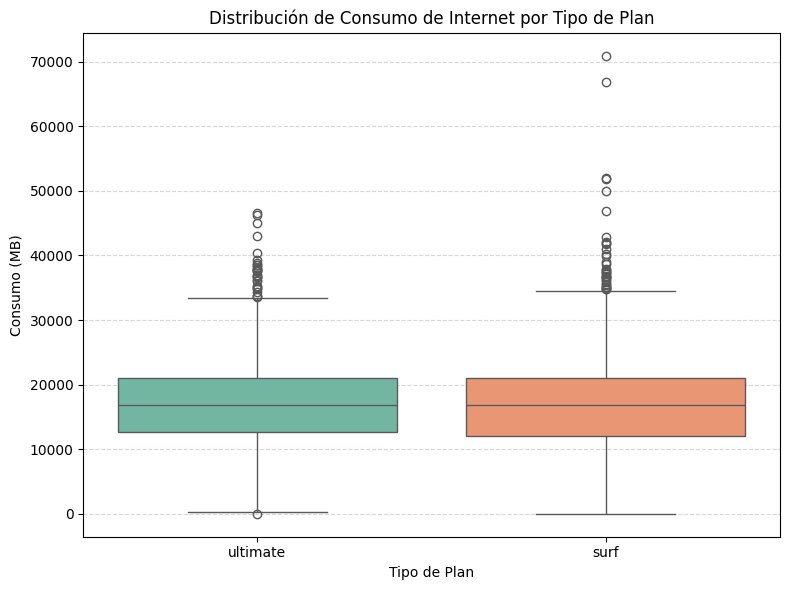

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type_plan', y='compil_internet', data=final_data, palette='Set2')
plt.title('Distribución de Consumo de Internet por Tipo de Plan')
plt.xlabel('Tipo de Plan')
plt.ylabel('Consumo (MB)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

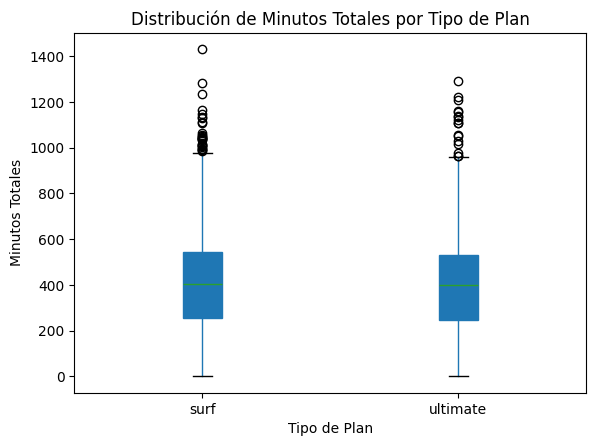

In [57]:
plt.figure(figsize=(10, 6))
final_data.boxplot(column='total_minutes', by='type_plan', grid=False, patch_artist=True)
plt.title('Distribución de Minutos Totales por Tipo de Plan')
plt.suptitle('')  
plt.xlabel('Tipo de Plan')
plt.ylabel('Minutos Totales')
plt.show()


## Prueba las hipótesis estadísticas

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [58]:
final_data['usd_monthly_pay'] = final_data['usd_monthly_pay'].fillna(0)
final_data['extra_charges'] = final_data['extra_charges'].fillna(0)

final_data['total_income'] = final_data['usd_monthly_pay'] + final_data['extra_charges']
surf_total_income = final_data[final_data['type_plan'] == 'surf']['total_income']
ultimate_total_income = final_data[final_data['type_plan'] == 'ultimate']['total_income']

surf_mean = surf_total_income.mean()
ultimate_mean = ultimate_total_income.mean()

alpha = 0.05

results = st.ttest_ind(surf_total_income, ultimate_total_income)
print('Valor p:', results.pvalue)

if results.pvalue < 0.05:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")


Valor p: 7.423864816541816e-60
Rechazamos la hipótesis nula.


Aunque los planes muestran ser muy diferentes,  los ingresos obtenidos no reflejan variaciones, y eso hace ver que el cliente esta disfrutando el plan de su elección


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Añadimos el Df 'users' al Df 'final_data' para poder realizar la hipotesis de las ciudades

In [59]:
hip_city = pd.merge(final_data, users[['user_id', 'city']], how='left', on='user_id')
print(hip_city.head(5))


   user_id    month  call_count  total_minutes  message_count  \
0     1000  2018-12        16.0         116.83           11.0   
1     1001  2018-08        27.0         171.14           30.0   
2     1001  2018-09        49.0         297.69           44.0   
3     1001  2018-10        65.0         374.11           53.0   
4     1001  2018-11        64.0         404.59           36.0   

   compil_internet  messages_included  mb_per_month_included  \
0          1901.47               1000                  30720   
1          6919.15                 50                  15360   
2         13314.82                 50                  15360   
3         22330.49                 50                  15360   
4         18504.30                 50                  15360   

   minutes_included  usd_monthly_pay  ...  usd_per_message  usd_per_minute  \
0              3000               70  ...             0.01            0.01   
1               500               20  ...             0.03          

In [60]:
ny_nj_cities = hip_city[hip_city['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['total_income']
other_cities = hip_city[~hip_city['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['total_income']
alpha = 0.05  

results = st.ttest_ind(ny_nj_cities, other_cities) 

print('valor p: ', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.2786473500627791
No podemos rechazar la hipótesis nula


Aunque las ciudades presentan diferencias geográficas y quizá culturales y socioeconomicas el patrón del uso y consumo muestran ser muy  similares.
Esto puede sugerir que ciertos hábitos y preferencias van más alla de la localidad, pueden ser influenciados por factores globales, ciertas tendencias de moda y busqueda de productos similares y necesidades comunes.


## Conclusión general

El analisis realizado a los datos proporcionados nos muestra que ambos planes de prepago proporcionados por la empresa satisfacen a los clientes, ellos hacen uso al máximo de los beneficios de cada plan, algunos clientes si exceden pero eso demuestra que estan contentos y sin nigun problema pagan el uso de los beneficios.
Se realizo la comparación de llamadas, menasajes uso de internet de los clientes de ambos planes y no hay una diferencia significativa, durante el trabajo con los datos se tuvo que realizar la eliminación de duplicados y faltantes, se utilizaron diversos metodos y herramientas para poder trabajar con ellos y obtener la mejor información, se realizaron trabajos estadisticos y de suposición donde se nos mostro que no importa la ubicación geográfica, no hay una diferencia significativa.
Esto nos muestra que el cliente disfruta su plan de prepago seleccionado.

### Áreas para Seguir Investigando:
- **Exploración de correlaciones**: Podrías investigar si existen relaciones entre edad de usuario y consumo por tipo de servicio.
- **Modelos predictivos básicos**: Como próxima etapa, podrías predecir el plan óptimo para un nuevo usuario basado en su perfil.
- **Visualizaciones interactivas**: Incluir herramientas como Plotly para facilitar la exploración por parte del equipo comercial.
- **Segmentación avanzada**: Considera usar clustering para encontrar patrones de uso según características de los usuarios.